1. (Low Complexity) This scenario focuses on Zero-Dimensional (0-D) and One-Dimensional (1-D) Energy Balance Models (EBMs), gradually adding complexity. (Derived in part from the Climate Laboratory)
a. Assume Earth behaves like a blackbody radiator governed by 𝑂𝐿𝑅 = 𝜎𝑇4 where: 𝑠
• The outgoing longwave radiation (OLR) emitted by Earth has a measured global annual mean value of 238.5 W/m2.
• Ts is the global average surface temperature. •𝜎=
What is Ts under the blackbody radiation assumption, and how does it compare to measurements?

In [19]:
# Outgoing Longwave Radiation (OLR)
olr = 238.5 # W/m^2

# Stephan-Boltzmann constant
σ = 5.67e-8 # W/(m^2K^4)

# Mean surface temperature
Tₛ = (olr/σ)^(1/4)

254.66914551158553

[20th Century average](https://www.ncei.noaa.gov/access/monitoring/monthly-report/global/202213#:~:text=Updated%20NOAAGlobalTemp%20dataset-,Global%20Temperatures,C%20(57.0°F).) Tₛ: 13.9 Celcius: Estimate too low 

b. Now, correct OLR to account for the fact that only a fraction of energy emitted by Earth at the surface makes it out to space, due to the greenhouse effect, 𝑂𝐿𝑅 = 𝜏𝜎𝑇4, where
𝑠
𝜏 = 0.612 is the transmissivity, or fraction of emissions from the surface of the Earth,
that make it to space. What is Ts under this corrected expression, and how does it compare to measurements?

In [20]:
# Transmissivity
τ = 0.612

Tₛ = (olr/(σ*τ))^(1/4)


287.9310331566349

This Predicts that at current transmissivity, temperature will trend higher

c. Now we consider a simple 0-dimensional EBM:
```math
C \frac{dT_s}{dt} = (1 - \alpha)Q - \tau \sigma T_s ^4  
```
where:

• ASR is the ‘absorbed shortwave radiation’, which is part of the incoming energy
from the sun that is not reflected back, and is absorbed into the Earth system.
• OLR is the ‘outgoing longwave radiation’ emitted by Earth (incorporating the
greenhouse effect).

• Ts is the global average surface temperature.

• C is the heat capacity of the Earth system, which is approximated by the
amount of energy required to heat 100 meters of water. It is governed by the equation, 𝐶 = 𝑓𝜌𝑐𝑤𝐻, where 𝑓 is the fraction of the area of interest covered by water (as a whole, the fraction of Earth covered by water is 0.7), 𝜌 is the density
of water (1025 𝑘𝑔 ), 𝑐 is the specific heat of water (4186 𝐽 ), and 𝐻 is the 𝑚3 𝑤 𝑘𝑔°C
depth of the water that is heated or cooled. For this problem, you can assume
𝑓 = 1, and 𝐻 = 100𝑚.

1
• 𝜏 = 0.612 is the transmissivity, or fraction of emissions from the surface of the Earth, that make it to space.

•𝜎=5.67e-8 W/(m^2 K)

• 𝑄 = 341.3 𝑊/m^2\ is the annual global average insolation, or the energy received
𝑚2
from incoming solar radiation per unit time per unit surface.

• 𝛼 = 0.299, is the planetary albedo, which is the fraction of 𝑄 that is reflected
back into space.
Determine the equilibrium temperature? Set 𝑇 (0) = 288 𝐾. How long does it take to
approach the equilibrium temperature (within some reasonable margin)? Plot 𝑇 over 𝑠
this period.

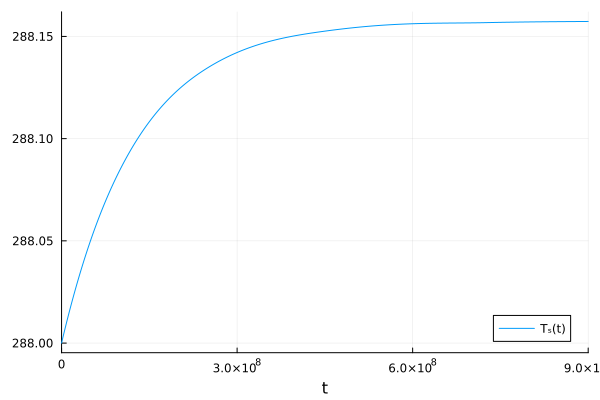

In [21]:
using ModelingToolkit, OrdinaryDiffEq

@variables t, Tₛ(t)

Dt = Differential(t)

# Water fraction (assumed 1.0, actual ~0.7)
f = 1.0
# rho is density of Water
ρ = 1025 # kg/m^3
# specific heat of Water
c_w = 4186 #J/(kgK)
# Depth of water

H = 100 #m

#Heat Cap of earth
C = f*ρ*c_w*H

# annual average global insolation
Q = 341.3 # W/m^2

# albedo
α = 0.299

eq = [Dt(Tₛ) ~ ((1 - α)*Q - τ*σ*Tₛ^4)/C]

@named sys = ODESystem(eq, t, defaults = Dict(Tₛ => 288)) # default in Kelvin

simpsys = structural_simplify(sys)

prob = ODEProblem(sys, [], (0.0, 9.0e8))

sol = solve(prob, Tsit5())

using Plots

plot(sol)


It takes approximately 19 years to reach equillibrium


d. Let’s assume that global warming affects the atmospheric composition and cloudiness,
such that 𝛼 is increased to 0.31, and 𝜏 is decreased to 0.58. Set 𝑇 (0) to the equilibrium 𝑠
temperature in question 1c. How long does it take to approach the new equilibrium temperature due to the perturbation? Does the change (and direction of change) in equilibrium temperature make sense given the nature of the perturbation?


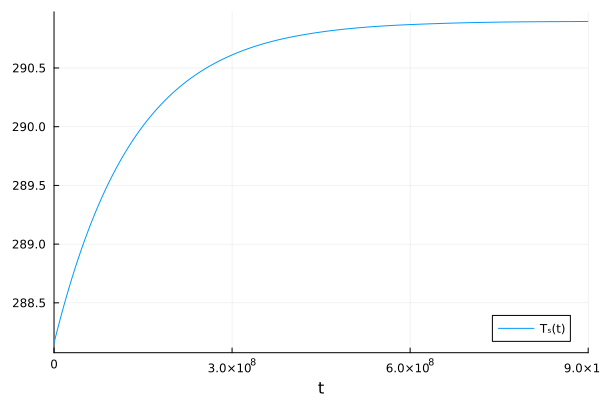

In [22]:
α = 0.31
τ = 0.58

eq = [Dt(Tₛ) ~ ((1 - α)*Q - τ*σ*Tₛ^4)/C]

@named sys = ODESystem(eq, t, defaults = Dict(Tₛ => 288.1573171596813)) # default in Kelvin

simpsys = structural_simplify(sys)

prob = ODEProblem(sys, [], (0.0, 9.0e8))

sol = solve(prob, Tsit5())

using Plots

plot(sol)

again about 19 years to reach equilibrium, this makes sense due to a pronounced reduction in transmissivity compared to small increase in albedo

Now let’s represent a simple greenhouse model by adding an atmosphere layer that absorbs and emits longwave radiation. This model makes the following simplifying assumptions (shown in this diagram):
![single layer atmosphere](sla.png)


• The atmosphere can be represented by a single layer with temperature 𝑇 𝑎

• The atmosphere is transparent to shortwave solar radiation (shown in the diagram above with
 the yellow arrows), and completely opaque to infrared radiation (shown in the diagram above the red arrows).

• The surface absorbs (1 − 𝛼)𝑄 amount of shortwave radiation.

• Both surface and atmosphere emit blackbody radiation.

• There are no other heat transfer mechanisms.

What are the temperatures for the surface and atmosphere, at radiative equilibrium? To answer this, you will need to balance energy for each layer. How does the surface temperature compare to observed data? Why do you think there is a difference?

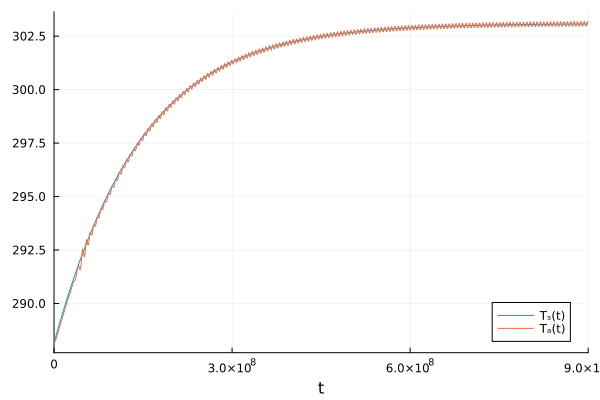

In [23]:
# atmospheric temperature
@variables Tₐ(t)

τ = 0.612
α = 0.299


#Heat Cap of earth
Cₑ = f*ρ*c_w*H

# heat cap of atmosphere https://atmos.washington.edu/~dennis/321/321_Lecture_12.pdf
Cₐ = 1.02e7 # J/(kg*m^2)

eqs = [Dt(Tₛ) ~ ((1 - α)*Q - σ*Tₛ^4 + 0.5*σ*Tₐ^4)/Cₑ,
       Dt(Tₐ) ~ (σ*Tₛ^4 - σ*Tₐ^4)/Cₐ]


# ? atmos ic
@named sys = ODESystem(eqs, t, defaults = Dict([Tₛ => 288.1573171596813, Tₐ => 288.15])) # default in Kelvin

simpsys = structural_simplify(sys)

prob = ODEProblem(sys, [], (0.0, 9.0e8))

sol = solve(prob, Tsit5())

using Plots

plot(sol)

Temperatures come out to approx 303K, much hotter than observed temperatures. This could be due to treating the whole atmosphere as if it had the same temerature as at the surface, and treating it as opaque to IR

f. To add more realism into our model, we add yet another layer to our atmosphere, so that our model is now represented by the diagram below. This is known as the two-layer grey gas model (named this because emission and absorption processes have no wavelength/spectral dependence).
![grey gas](2layerAtm_sketch.png)


This model makes the following assumptions:

• The atmosphere is divided into two layers of equal mass; the dividing line is the
500 hPa pressure level.

• Each atmosphere layer absorbs a fraction epsilon, 𝜖, of the longwave radiation
incident upon it and is the same for both layers. Therefore, (1 − 𝜖) of the
longwave radiation is transmitted through each layer.

• Each atmosphere layer is still fully transparent to shortwave radiation (shown in
the diagram by the yellow arrows)

• For the atmospheric layers, absorptivity = emissivity (Kirchoff’s Law).

• According to this model, we find that
𝑂𝐿𝑅 = (1 − 𝜖)2𝜎𝑇4 + 𝜖(1 − 𝜖)𝜎𝑇4 + 𝜖𝜎𝑇4.

I. What is the effect of varying 𝜖 from [0,1]? What value of 𝜖 best matches observed valuesof 𝑂𝐿𝑅 = 238.5 𝑊/m^2 ; 𝑇 = 288𝐾; 𝑇 = 275𝐾; 𝑇 = 230𝐾?

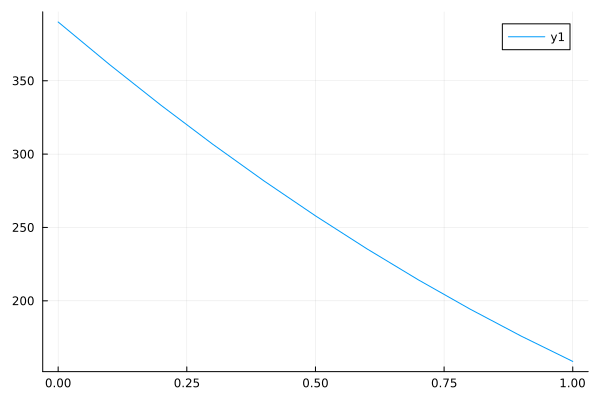

In [24]:
greygasolr(ϵ) = (1 - ϵ)^2*σ*288^4 + ϵ*(1-ϵ)*σ*275^4 + ϵ*σ*230^4

dϵ = 0:0.1:1

plot(dϵ, greygasolr.(dϵ))


increasing ϵ, decreasing OLR

In [25]:

@variables ε

eq = 0 ~ 238.5 - greygasolr(ε) 

@named sys = NonlinearSystem([eq], [ε], []) # Yes you can do it with quadratic formula but who has the time?

simpsys = structural_simplify(sys)

using NonlinearSolve

prob = NonlinearProblem(sys, [0.5], [])

sol = NonlinearSolve.solve(prob, NewtonRaphson())

ϵ = sol.u[1]

0.5860411502483098

best match to observation at ϵ = 0.586

II. What is the radiative equilibrium solution, and how does it compare to observed temperatures? If there is a difference, why do you think that is the case?

In [26]:
# Equilibrium solution
@variables Tₛ T₀ T₁

U₀ = σ*Tₛ^4
U₁ = (1 - ϵ)*U₀ + ϵ*σ*T₀^4
U₂ = (1 - ϵ)*U₁ + ϵ*σ*T₁^4

eq = [0 ~ ((1-α)*Q - U₀)/Cₑ,
      0 ~ (ϵ*U₀ - ϵ*σ*T₀^4)/Cₐ,
      0 ~ (ϵ*U₁ - ϵ*σ*T₁^4)/Cₐ]

@named sys = NonlinearSystem(eq, [Tₛ, T₀, T₁], []) 

simpsys = structural_simplify(sys)

prob = NonlinearProblem(sys, [288, 275, 230], [])

sol = NonlinearSolve.solve(prob, NewtonRaphson())

@show simpsys.states .=> sol.u


simpsys.states .=> sol.u = Pair{SymbolicUtils.BasicSymbolic{Real}, Float64}[Tₛ => 260.16048075846095, T₀ => 256.97396270192417, T₁ => 259.2017269513092][1:3]


Pair{SymbolicUtils.BasicSymbolic{Real}, Float64}[Tₛ => 260.16048075846095, T₀ => 256.97396270192417, T₁ => 259.2017269513092][1:3]

In radiative equilibrium, Temperatures are all equivalent at around 260 Kelvin. It is clear that this should be different from our case as our planet is warming.

III. Automate the extension of this model to include an arbitrary number of atmospheric layers

In [27]:
N = 10
@variables T[1:N]

U₀ = σ*T[1]^4
U = [U₀]
for i in 2:N
    push!(U, (1 - ϵ)*U[i-1] + ϵ*σ*T[i]^4)
end

# As many layers as you want
eqs = [0 ~ ((1-α)*Q - U₀)/Cₑ;
      [0 ~ (ϵ*U[i-1] - ϵ*σ*T[i]^4)/Cₐ for i in 2:N]]     


10-element Vector{Equation}:
 0 ~ 2.3306492023353105e-9(239.25130000000004 - 5.67e-8(T[1]^4))
 0 ~ 9.80392156862745e-8(3.322853321907917e-8(T[1]^4) - 3.322853321907917e-8(T[2]^4))
 0 ~ 9.80392156862745e-8(0.5860411502483098(2.3471466780920833e-8(T[1]^4) + 3.322853321907917e-8(T[2]^4)) - 3.322853321907917e-8(T[3]^4))
 0 ~ 9.80392156862745e-8(0.5860411502483098(3.322853321907917e-8(T[3]^4) + 0.41395884975169017(2.3471466780920833e-8(T[1]^4) + 3.322853321907917e-8(T[2]^4))) - 3.322853321907917e-8(T[4]^4))
 0 ~ 9.80392156862745e-8(0.5860411502483098(0.41395884975169017(3.322853321907917e-8(T[3]^4) + 0.41395884975169017(2.3471466780920833e-8(T[1]^4) + 3.322853321907917e-8(T[2]^4))) + 3.322853321907917e-8(T[4]^4)) - 3.322853321907917e-8(T[5]^4))
 0 ~ 9.80392156862745e-8(0.5860411502483098(0.41395884975169017(0.41395884975169017(3.322853321907917e-8(T[3]^4) + 0.41395884975169017(2.3471466780920833e-8(T[1]^4) + 3.322853321907917e-8(T[2]^4))) + 3.322853321907917e-8(T[4]^4)) + 3.322853321907917e

g. One-Dimensional Energy Balance Model (EBM): One of the issues with simpler models such as the ones described in the above sections, is that they lack important processes like heat transport. In moving from 0-D to 1-D models, we now think about regional climates and energy transfer between latitude zones.
3
 Consider the following 1-D EBM, also known as the Budyko-Sellers model:
```math
C(\varphi) \frac{\partial T_s}{\partial t} = (1 - \alpha(\varphi, t))Q(\varphi, t) - A + BT_s(\varphi, t) + \frac{D}{cos \varphi} \frac{\partial}{\partial \varphi}(cos \varphi \frac{\partial T_s(\varphi, t)}{\partial \varphi})
```

  where,

• Surface temperature Ts is a function of both time t and latitude 𝜑.

• Here we choose a simple parameterization of OLR (although this could be made
more complex) with 𝐴 = 210 𝑊 , representing longwave emissions at 0°C, and 𝑚2
𝐵 = 2 𝑊 , representing the increase in emissions per degree. These values 𝑚2𝐶
were chosen based on tuning with reanalysis data from the National Oceanic and Atmospheric Administration (NOAA) - National Centers for Environmental Prediction (NCEP).

• We estimate albedo 𝛼(𝜑)≈𝛼0 +𝛼_2 𝑃_2(sin𝜑)where 𝑃_2(𝑥)=1/2(3x^2 − 1)is 
the 2nd Legendre polynomial, 𝛼0 = 0.354 (global planetary albedo), 𝛼2 = 0.25. This function (orange line) was chosen as a relatively good fit to observed data (blue line, from NCEP reanalysis) where we get the correct global mean and representation of equator-to-pole gradient in the albedo, to reflect increased albedo towards the poles due to greater surface snow and ice.

• 𝐶(𝜑) is effective heat capacity of the atmosphere at latitude 𝜑, in units 𝐽 . 𝑚2°C
We describe this as a function of latitude so this model can be generalized different land-ocean fractions at different latitudes (although that is not the focus of this problem). For this scenario we can assume this is a constant value
given by 𝐶 = 𝑓𝜌𝑐𝑤𝐻 , as described in 1c, but here assume more realistic values
with 𝑓 = 0.70, and the depth of the ocean mixed layer 𝐻 = 70𝑚.

• Insolation values 𝑄(𝜑, 𝑡) can be obtained and averaged to get annual mean
values, as described [here](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/insolation.html#the-daily-average-zenith-angle)

• Assume the horizontal diffusivity of the climate system 𝐷 = 0.6 𝑊 𝑚2°C

Assume annual mean values (in other words, assume a timestep of 1 year), and solve
the full time-varying 1D EBM as defined in this problem, assuming an initial temperature
profile that is warm at the equator and cold at the poles: 𝑇 (𝜑, 0) = 12 − 40𝑃 (sin 𝜑), 𝑠2
where 𝑃 is the 2nd Legendre polynomial as defined earlier. Assume no-flux boundary 2
   conditions at the poles. What is the steady state equilibrium temperature profile as a function of latitude, 𝑇 (𝜑)?


In [28]:
using MethodOfLines, DomainSets

@parameters φ t
@variables Tₛ(..)

Dt = Differential(t)
Dφ = Differential(φ)

A = 210 # W/m^2
B = 2 # W/m^2K
D = 0.6 # W/m^2K

P₂(x) = 0.5*(3*x^2 - 1)
α_func(ϕ) = 0.354 + 0.25*P₂(sin(ϕ))
Q_func(t, ϕ) = 430*cos(ϕ)

# Water fraction
f = 0.7
# rho is density of Water
ρ = 1025 # kg/m^3
# specific heat of Water
c_w = 4186 #J/(kgK)
# Depth of water
H = 70 #m

#Heat Cap of earth
C = f*ρ*c_w*H

eq = C*Dt(Tₛ(t, φ)) ~ (1 - α_func(φ))*Q_func(t, φ) - A + B*Tₛ(t, φ) + D*Dφ(cos(φ)*Dφ(Tₛ(t, φ)))/cos(φ)

bcs = [Tₛ(0, φ) ~ 12 - 40*P₂(sin(φ)),
       Tₛ(t, -Float64(π)) ~ Tₛ(t, Float64(π))]
domains = [t in IntervalDomain(0, 9.0e8), φ in IntervalDomain(-Float64(π), Float64(π))]

@named sys = PDESystem(eq, bcs, domains, [t, φ], [Tₛ(t, φ)])

discretization = MOLFiniteDifference([φ => 130], t)

prob = discretize(sys, discretization) # ERROR HERE

sol = solve(prob, Tsit5())

UndefVarError: UndefVarError: `φ` not defined